In [1]:
import PySpin
import AcquisitionMultipleThread as AMT
import cv2
import PyNvVideoCodec as nvc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get list of cameras
system = PySpin.System.GetInstance()
cam_list = system.GetCameras()
cam = cam_list.GetByIndex(0)
# Start streaming and check if it is streaming
cam.Init()
cam.BeginAcquisition()


In [4]:
# Get camera resolution
width = cam.Width.GetValue()
height = cam.Height.GetValue()
fps = cam.AcquisitionFrameRate.GetValue()
width, height, fps

(1280, 1024, 150.71383666992188)

In [3]:
nvc.GetNumGpus()

AttributeError: module 'PyNvVideoCodec' has no attribute 'GetNumGpus'

nodemaps are important for getting the metadata from the camera
should check the the image that you are tryng to aquire is completely captured before saving it.

Camera is streaming:  True


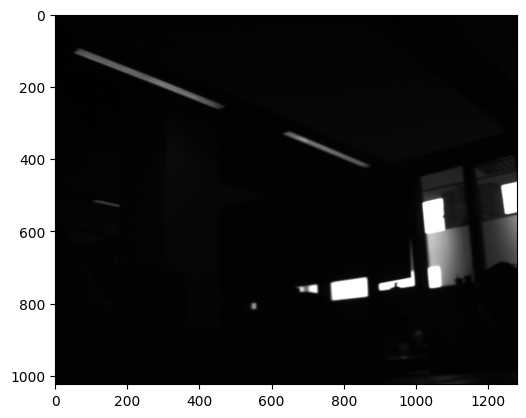

In [10]:
print("Camera is streaming: ", cam.IsStreaming())
image_result = cam.GetNextImage()
plt.imshow(image_result.GetNDArray(), cmap='gray')
plt.show()



In [11]:
# instantiate the encoder from the PyNvVideoCodec module
encoder = nvc.CreateEncoder(width,
                            height,
                            'NV12', 
                            False,
                            )
# encode the image

# encoded_image = encoder.Encode(image_result.GetNDArray())


: 

In [15]:
# Save video to a file
cam.AcquisitionMode.SetValue(PySpin.AcquisitionMode_Continuous)

cam.BeginAcquisition()
#access the image buffer


<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
<class 'PySpin.PySpin.ImagePtr'>
Video acquisition stopped and saved to video_capture.avi


In [ ]:

# Create a unique filename
filename = "video_capture.avi"

# Open a file to save the video
with open(filename, 'wb') as video_file:
    try:
        while True:
            # Retrieve the next image from the camera
            image_result = cam.GetNextImage()
            print(type(image_result))
            # Ensure image completion
            if image_result.IsIncomplete():
                print("Image incomplete with image status %d ..." % image_result.GetImageStatus())
            else:
                # Get the image data
                image_data = image_result.GetData()
                
                # Write the image data to the file
                video_file.write(image_data)
                
                # Release the image
                image_result.Release()

            # Sleep for a short duration to simulate frame rate
            time.sleep(0.1)
    except KeyboardInterrupt:
        # End acquisition when interrupted
        cam.EndAcquisition()
        print("Video acquisition stopped and saved to", filename)